### **Importação da biblioteca pandas para manipulação do csv.**

In [ ]:
#Leitor e manipulador de dados
import pandas as pd

# Plot dos gráficos
import matplotlib.pyplot as plt 
import matplotlib 

from matplotlib import colors
import seaborn as sns

# Algoritmos de Agrupamento
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# formatação e treino
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Avaliacao de desempenho
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, classification_report

#Regressão Linear 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

import statistics

#Importando Algoritimos para Machine Learning - Regressão
from sklearn.preprocessing import StandardScaler # Importando o Escalonador de Normalização
from sklearn.neural_network import MLPRegressor # Importando a Rede Neural MLP para Regressão
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

#Importando Algoritimos para Machine Learning - Classificação
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### *Inclusão do csv de velocidade.*



In [ ]:
dados = pd.read_csv('dataset_velocidade.csv', sep=',') #carregando o arquivo csv usando ',' como separador

### *Informações sobre a tipagem dos dados.*

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124684 entries, 0 to 124683
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   no_speed_bump     123437 non-null  float64
 1   acc_x_dashboard   123437 non-null  float64
 2   acc_y_dashboard   123437 non-null  float64
 3   acc_z_dashboard   123437 non-null  float64
 4   gyro_x_dashboard  123437 non-null  float64
 5   gyro_y_dashboard  123437 non-null  float64
 6   gyro_z_dashboard  123437 non-null  float64
 7   temp_dashboard    123437 non-null  float64
 8   speed             123437 non-null  float64
 9   road              124684 non-null  object 
dtypes: float64(9), object(1)
memory usage: 9.5+ MB


### *Manipulação do DataFrame retirando dados como NaN e Null*



In [ ]:
dados.isnull().sum()

no_speed_bump       1247
acc_x_dashboard     1247
acc_y_dashboard     1247
acc_z_dashboard     1247
gyro_x_dashboard    1247
gyro_y_dashboard    1247
gyro_z_dashboard    1247
temp_dashboard      1247
speed               1247
road                   0
dtype: int64

In [ ]:
dados = dados.dropna()

### *Estatisticas sobre os dados do DataFrame*

In [ ]:
dados.describe()

,no_speed_bump,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,temp_dashboard,speed
count,113907.000000,113907.000000,113907.000000,113907.000000,113907.000000,113907.000000,113907.000000,113907.000000,113907.000000
mean,0.983890,0.617598,-0.243573,9.828651,0.014348,-0.079862,-0.200891,32.829411,9.238009
std,0.125898,1.432777,1.966313,1.705233,3.482269,5.409570,3.581927,0.417761,6.301162
min,0.000000,-8.710806,-13.290681,-3.705523,-35.766602,-69.159159,-23.091944,0.000000,0.005860
25%,1.000000,-0.091680,-1.171232,9.084302,-1.220703,-1.959452,-1.516017,32.501483,4.586517
50%,1.000000,0.518841,-0.208763,9.824110,0.000000,-0.052103,-0.081690,32.789020,6.692151
75%,1.000000,1.325687,0.588506,10.593846,1.266479,1.809469,1.261083,33.172402,15.029036
max,1.000000,13.957495,18.276868,24.024120,44.708252,62.432638,22.165624,33.843322,21.592090


In [ ]:
dados.head(10) # Mostrando os 10 primeiros dados.


,no_speed_bump,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,temp_dashboard,speed,road
1,1.0,-0.039008,0.009110,9.819322,-0.030518,0.115743,-0.051173,32.453560,0.010822,paved
2,1.0,0.010073,0.005518,9.777423,-0.122070,0.100485,-0.020655,32.405637,0.010822,paved
3,1.0,0.020847,0.028263,9.785803,0.061035,0.207296,-0.112208,32.453560,0.010822,paved
4,1.0,-0.003095,-0.017227,9.800168,-0.091553,0.146261,-0.112208,32.309791,0.010822,paved
5,1.0,0.006482,0.011504,9.850446,0.000000,-0.342020,-0.081690,32.357714,0.010822,paved
6,1.0,0.001693,0.001927,9.753481,-0.045776,-0.189432,0.040380,32.333753,0.010822,paved
7,1.0,-0.024643,-0.002861,9.807351,0.030518,-0.067362,-0.020655,32.309791,0.010822,paved
8,1.0,-0.029431,0.004321,9.749890,-0.183105,0.115743,-0.051173,32.357714,0.010822,paved
9,1.0,0.011270,0.010307,9.767846,-0.030518,-0.052103,-0.020655,32.309791,0.010822,paved
10,1.0,0.016059,0.009110,9.745101,0.091553,0.207296,-0.081690,32.357714,0.010822,paved


In [ ]:
dados.tail(10) # Mostrando os 10 ultimos dados.

,no_speed_bump,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,temp_dashboard,speed,road
124674,1.0,0.305757,-0.594229,9.579902,-0.122070,-0.128397,0.009862,32.118100,0.02357,paved
124675,1.0,0.379977,-0.469731,9.840870,0.183105,-0.189432,-0.173243,32.166023,0.02357,paved
124676,1.0,0.467366,-0.299742,9.936638,0.015259,0.237814,0.025121,32.070177,0.02357,paved
124677,1.0,0.353641,-0.433818,9.754678,0.152588,-0.250467,-0.142726,31.974331,0.02357,paved
124678,1.0,0.341670,-0.555922,9.711583,-0.061035,0.024191,-0.112208,32.309791,0.02357,paved
124679,1.0,0.427861,-0.261435,9.958185,0.030518,-0.006327,0.070898,32.070177,0.02357,paved
124680,1.0,0.466169,-0.316502,9.867206,-0.122070,-0.082621,-0.020655,32.094138,0.02357,paved
124681,1.0,0.332093,-0.555922,9.646939,-0.183105,-0.067362,0.101415,32.261868,0.02357,paved
124682,1.0,0.339276,-0.570287,9.824110,-0.122070,-0.006327,-0.173243,32.070177,0.02357,paved
124683,1.0,0.439832,-0.201580,10.101838,0.000000,0.176779,-0.234278,32.070177,0.02357,paved


In [ ]:
dados.groupby('speed').max() # Verificando a maior velocidade

,no_speed_bump,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,temp_dashboard,road
speed,,,,,,,,,
0.005860,1.0,0.195624,0.267683,10.168875,0.701904,0.665060,0.345556,32.693174,paved
0.005907,1.0,0.226748,0.373028,10.334075,0.701904,0.726095,0.315038,32.789020,paved
0.006036,1.0,0.066337,0.064176,9.888754,0.457764,0.329367,0.284521,32.645251,paved
0.006661,1.0,0.164499,0.291625,10.264643,0.762939,0.481954,0.376073,32.789020,paved
0.007258,1.0,0.329699,0.286837,10.317316,0.732422,0.695577,0.223485,32.789020,paved
...,...,...,...,...,...,...,...,...,...
21.483824,1.0,2.216330,0.993127,12.074660,1.434326,4.510275,0.467626,32.645251,paved
21.521412,1.0,2.057116,1.019463,11.703558,2.380371,4.357687,0.315038,32.669213,paved
21.560787,1.0,1.830864,1.165509,11.655674,1.739502,3.350607,1.169530,32.645251,paved


### *Verificação dos dados sobre a coluna ROAD que é a coluna que será á base da Análise.*

In [ ]:
dados.groupby('road').count()

,no_speed_bump,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,temp_dashboard,speed
road,,,,,,,,,
asphalt,547,547,547,547,547,547,547,547,547
cobblestone,181,181,181,181,181,181,181,181,181
dirt,410,410,410,410,410,410,410,410,410
paved,72434,72434,72434,72434,72434,72434,72434,72434,72434
unpaved,40335,40335,40335,40335,40335,40335,40335,40335,40335


In [ ]:
print(f"Linhas: {dados.shape[0]}")
print(f"Colunas: {dados.shape[1]}")

Linhas: 113907
Colunas: 10


### *Verificação de Outliers*

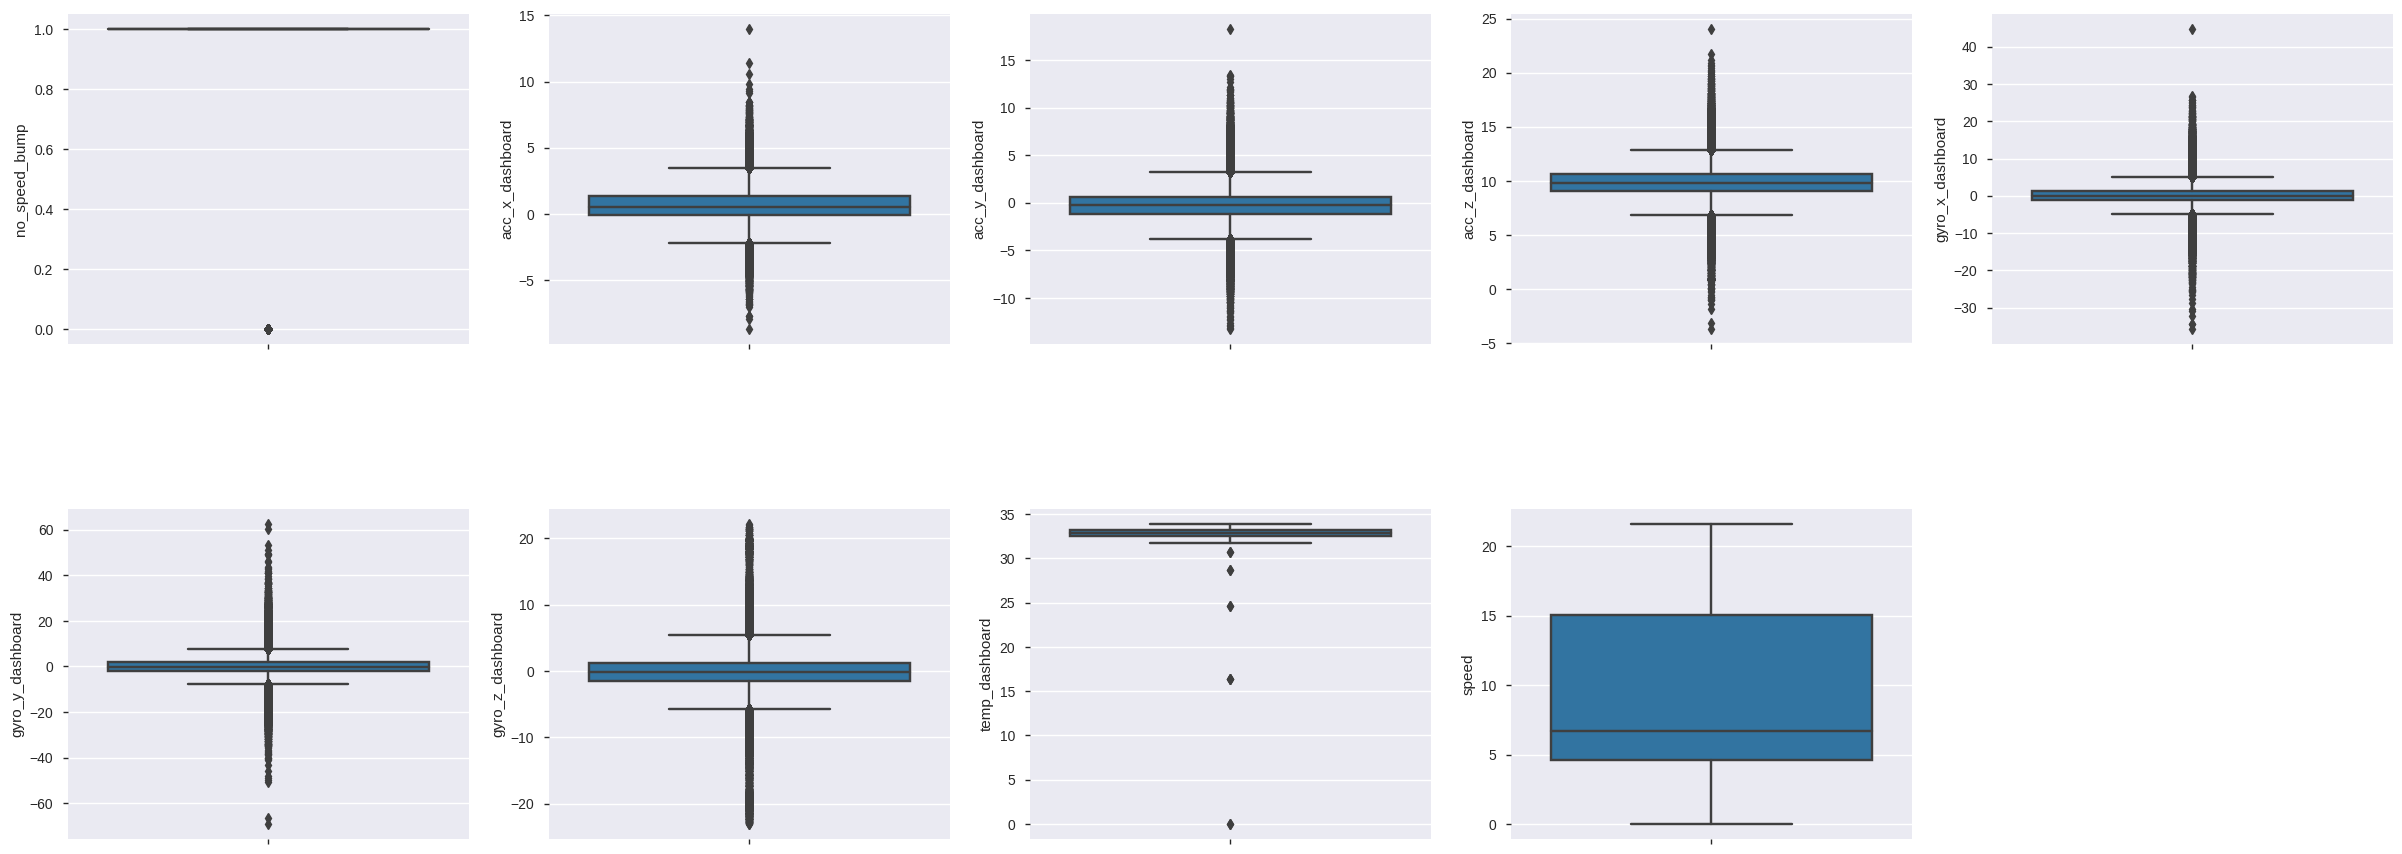

In [ ]:
plt.figure(figsize=(30,30))
plt.subplots_adjust(hspace=0.5)

i = 1
for col_name in dados.columns.drop('road'):
    plt.subplot(5,5,i)
    sns.boxplot(data=dados, y=col_name)
    i +=1

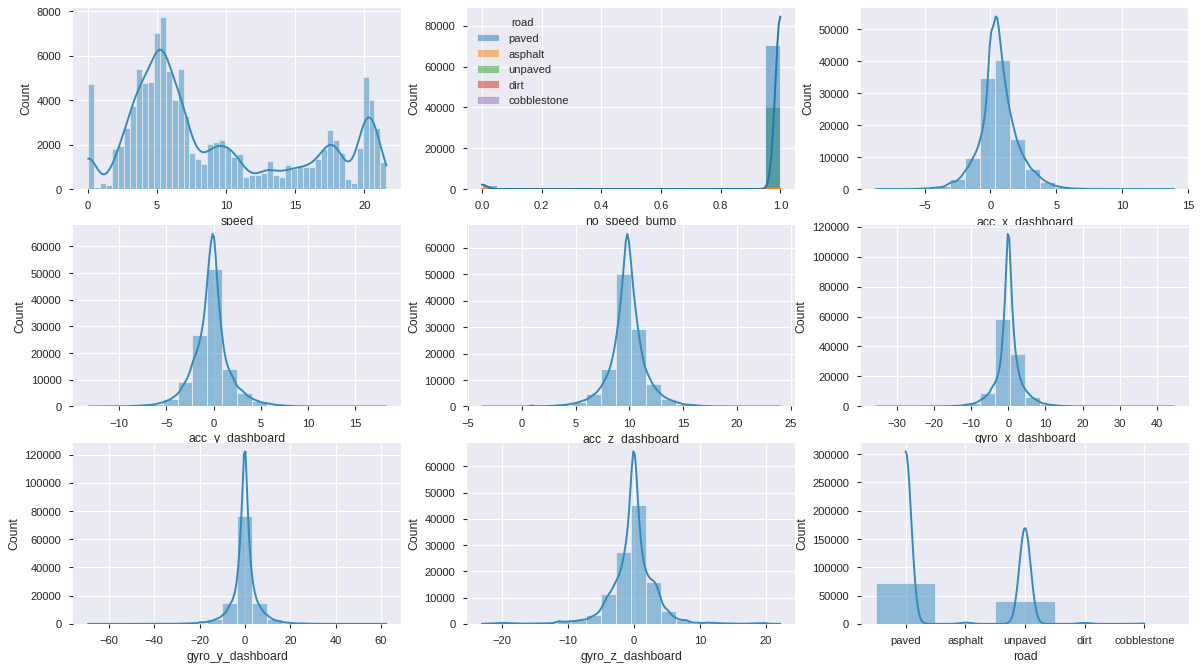

<Figure size 1200x600 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10), dpi=80)
plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace = 0.80, hspace=0.80)

sns.histplot(ax=axes[0][0],
            data=dados,  # Perceba que estamos passando a coluna o dataframe completo
            x = 'speed', # E aqui estamos selecionando a coluna
            kde=True,
            bins=50,
            linewidth=0.6,    
            )

sns.histplot(ax=axes[0][1],
            data=dados,
            x = 'no_speed_bump',
            kde=True,
            bins=20,
            linewidth=0.7,
            hue = 'road'
            )
sns.histplot(ax=axes[0][2],
            data=dados,
            x = 'acc_x_dashboard',
            kde=True,
            bins=20,
            linewidth=0.7,
            )
sns.histplot(ax=axes[1][0],
            data=dados,

            x = dados['acc_y_dashboard'],
            kde=True,
            bins=20,
            linewidth=0.7,
            )
sns.histplot(ax=axes[1][1],
            data=dados,
            x = dados['acc_z_dashboard'],
            kde=True,
            bins=20,
            linewidth=0.7,
            )
sns.histplot(ax=axes[1][2],
            data=dados,
            x = dados['gyro_x_dashboard'],
            kde=True,
            bins=20,
            linewidth=0.7,
            )
sns.histplot(ax=axes[2][0],
            data=dados,
            x = dados['gyro_y_dashboard'],
            kde=True,
            bins=20,
            linewidth=0.7,
            )
sns.histplot(ax=axes[2][1],
            data=dados,
            x = dados['gyro_z_dashboard'],
            kde=True,
            bins=20,
            linewidth=0.7,
            )
sns.histplot(ax=axes[2][2],
            data=dados,
            x = dados['road'],
            kde=True,
            bins=5,
            linewidth=0.7,
            )





### *Neste grafico acima é possivel verificar o aumento expressivo da velocidade em ruas não pavimentadas*

<Figure size 800x550 with 0 Axes>

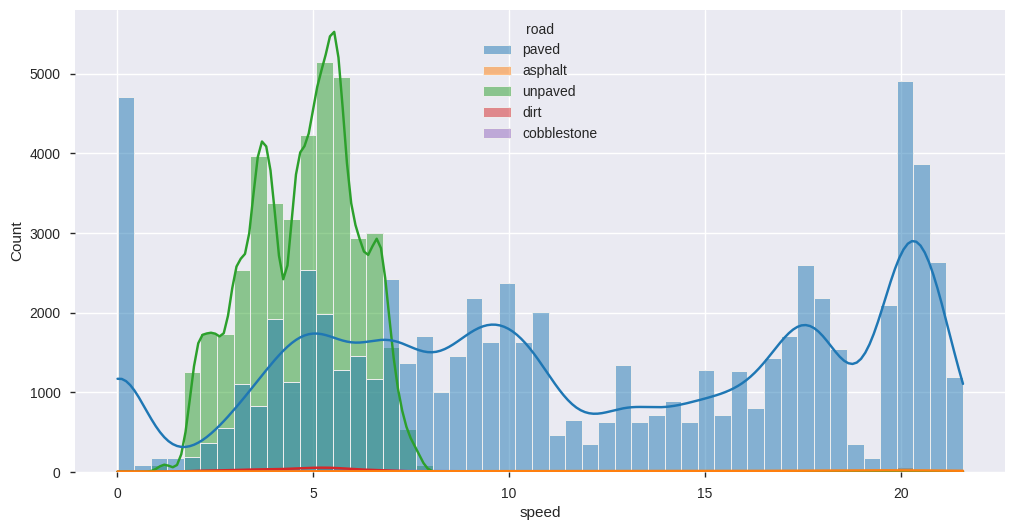

In [ ]:
plt.subplots_adjust(wspace = 0.60, hspace=0.60)
plt.figure(figsize=(12,6))

sns.histplot(
            data=dados,  # Perceba que estamos passando a coluna o dataframe completo
            x = 'speed', # E aqui estamos selecionando a coluna
            kde=True,
            linewidth=0.7,
            hue = 'road',
            )                        






### *Utilização de One hot encoding para transformar colunas que estão como object como por exemplo a coluna 'road', assim separando ela em 5 tipos de ruas.*

In [ ]:
dadosEs = ['road']
dadosR = pd.get_dummies(dados, columns=dadosEs)


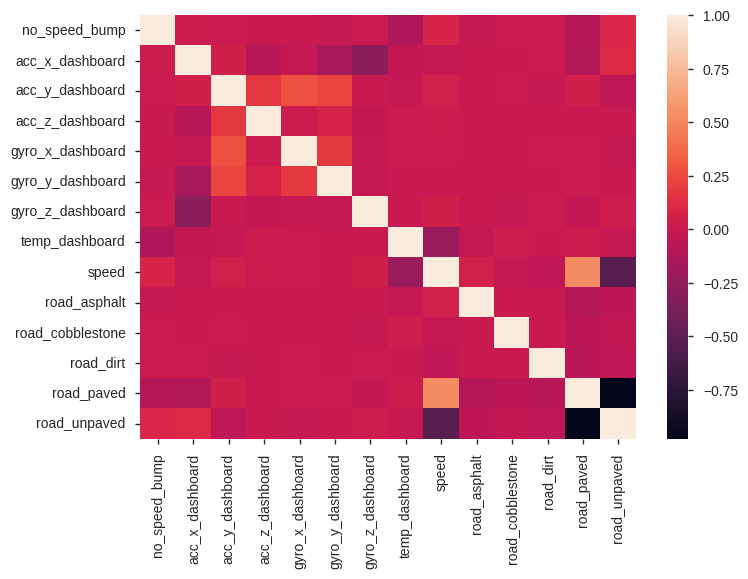

In [ ]:
sns.heatmap(dadosR.corr())

In [ ]:
display(dadosR)

,no_speed_bump,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,temp_dashboard,speed,road_asphalt,road_cobblestone,road_dirt,road_paved,road_unpaved
1,1.0,-0.039008,0.009110,9.819322,-0.030518,0.115743,-0.051173,32.453560,0.010822,0,0,0,1,0
2,1.0,0.010073,0.005518,9.777423,-0.122070,0.100485,-0.020655,32.405637,0.010822,0,0,0,1,0
3,1.0,0.020847,0.028263,9.785803,0.061035,0.207296,-0.112208,32.453560,0.010822,0,0,0,1,0
4,1.0,-0.003095,-0.017227,9.800168,-0.091553,0.146261,-0.112208,32.309791,0.010822,0,0,0,1,0
5,1.0,0.006482,0.011504,9.850446,0.000000,-0.342020,-0.081690,32.357714,0.010822,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124679,1.0,0.427861,-0.261435,9.958185,0.030518,-0.006327,0.070898,32.070177,0.023570,0,0,0,1,0
124680,1.0,0.466169,-0.316502,9.867206,-0.122070,-0.082621,-0.020655,32.094138,0.023570,0,0,0,1,0
124681,1.0,0.332093,-0.555922,9.646939,-0.183105,-0.067362,0.101415,32.261868,0.023570,0,0,0,1,0
124682,1.0,0.339276,-0.570287,9.824110,-0.122070,-0.006327,-0.173243,32.070177,0.023570,0,0,0,1,0


In [ ]:
dados['road'].value_counts() # Retirada das colunas Asphalt, Dirt e Cobblestone, pois irão atrapalhar na Análise devido a baixa quantidade de dados

paved          72434
unpaved        40335
asphalt          547
dirt             410
cobblestone      181
Name: road, dtype: int64



### **1.   Utilização do algoritmo de regressão linear**




In [ ]:
# Escolhendo as colunas preditivas e alvo
x = dadosR.drop(columns = ['speed', 'road_cobblestone', 'road_asphalt', 'road_dirt']) #Retirada de dados insuficientes para o algoritimo
y = dadosR['speed']
# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113907 entries, 1 to 124683
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   no_speed_bump     113907 non-null  float64
 1   acc_x_dashboard   113907 non-null  float64
 2   acc_y_dashboard   113907 non-null  float64
 3   acc_z_dashboard   113907 non-null  float64
 4   gyro_x_dashboard  113907 non-null  float64
 5   gyro_y_dashboard  113907 non-null  float64
 6   gyro_z_dashboard  113907 non-null  float64
 7   road_paved        113907 non-null  uint8  
 8   road_unpaved      113907 non-null  uint8  
dtypes: float64(7), uint8(2)
memory usage: 7.2 MB


In [ ]:
# 3 - Escalonamento
scaler = StandardScaler() # Criando o objeto de escalonamento 
scaler.fit(x_train) # Passando os dados de treinamento para encontrar a escala

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

# Instanciando o Escalonador
scaler = StandardScaler()
#scaler = MinMaxScaler()

# # Treinando o escalonador
# scaler.fit(x_train)

# # Usando o escalonador treinado para transformar os dados
# x_train_scaled = scaler.transform(x_train)
# x_test_scaled = scaler.transform(x_test)

In [ ]:
len(x_train_escalonado), len(x_test_escalonado), len(y_train), len(y_test) # Tamanho das variáveis de treino e teste.

(79734, 34173, 79734, 34173)

In [ ]:
model = LinearRegression().fit(x_train_escalonado,y_train)  # Objeto do regressor 



### *Testar o classificador criado e treinando no passo anterior.*




In [ ]:
# Perceba que estamos passando apenas o x de teste, afinal o algoritmo é que nos dira qual é o y 
y_pred = model.predict(x_test_escalonado) 

### Utilizando todos os tipos de Estátisticas aprendidas, como MAE, MSE, Raiz MSE, R2 e ρ.

In [ ]:
# Perceba que estamos passando apenas o x de teste, afinal o algoritmo é que nos dira qual é o y 
y_pred = model.predict(x_test_escalonado) 


MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                          y_pred = y_pred) # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MSE = mean_squared_error(y_true = y_test,      # Gabarito
                         y_pred = y_pred) # Respostas do algoritmo ao teste realizado
print('MSE: ', MSE)
print('raiz MSE: ', MSE**0.5)

R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_pred) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

rho = pearsonr(y_test, y_pred)
print('\u03C1:', rho[0]) # Quanto mais próximo de 1, melhor (OBS: apenas neste caso de utilização)

a_modelo = model.coef_      # Coeficientes angulares do modelo (cada um mede a influência de cada coluna)
b_modelo = model.intercept_ # Coeficiente linear do model

y_pred_linear = y_pred # Salvando as informações do Modelo Reg Linear para comparar depois

MAE:  4.04537385719752
MSE:  27.419724944456824
raiz MSE:  5.236384720821879
R2:  0.3059453391814023
ρ: 0.5531997921478328


In [ ]:
# 4 - Treino
# Instanciando o objeto
ml_perceptron = MLPRegressor(solver='lbfgs', # otimizador por métodos quasi-Newton
                             tol=1e-5, # Limiar para a otimização (treinamento)
                             max_iter=1500, # Limite de iterações durante a otimização (treinamento)
                             random_state=42, # (seed) pesos da rede são inicializados aleatoriamente
                             hidden_layer_sizes=(10,4), # Quantidade de neuronios por camada oculta #(12,7,3)
                             activation='relu') # Função de ativação dos neuronios

ml_perceptron.fit(x_train_escalonado, y_train)  # Treinando (perceba que estamos passando o x_train escalonado)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(hidden_layer_sizes=(10, 4), max_iter=1500, random_state=42,
             solver='lbfgs', tol=1e-05)

In [ ]:
# 5 - Teste
y_pred = ml_perceptron.predict(x_test_escalonado) # Perceba que estamos passando o x_test escalonado

R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_pred) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

rho = pearsonr(y_test, y_pred)
print('\u03C1:', rho[0]) # Quanto mais próximo de 1, melhor (OBS: apneas neste caso de utilização)

MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                          y_pred = y_pred) # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MSE = mean_squared_error(y_true = y_test,      # Gabarito
                         y_pred = y_pred) # Respostas do algoritmo ao teste realizado
print('MSE: ', MSE)

R2:  0.6334200926203793
ρ: 0.7959243169887349
MAE:  2.6866176975727916
MSE:  14.482317889283339


In [ ]:
y_predicoes_mlp = y_pred

### *No grafico conseguimos verificar que o valor da Reg Linear ficou próximo da linha correta. *

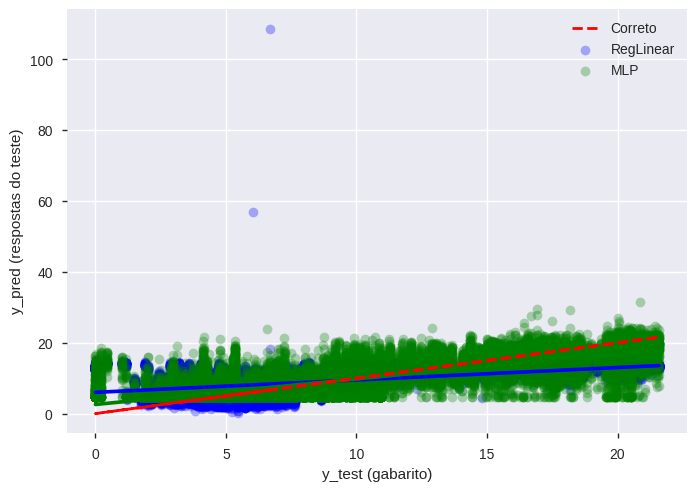

In [ ]:
ax = sns.regplot(x=y_test,y=y_pred_linear,
                 color="b", scatter_kws={'alpha':0.3}, label='RegLinear') # Regressão Linear
ax = sns.regplot(x=y_test,y=y_predicoes_mlp,
                 color="g", scatter_kws={'alpha':0.3}, label='MLP') # Rede Neural
ax.plot(y_test, y_test, 'r--', linewidth = 2, label='Correto') # Reta 100% correto
ax.set(xlabel='y_test (gabarito)', ylabel='y_pred (respostas do teste)') 
ax.legend()
#ax.set_xscale('log'), ax.set_yscale('log')

In [ ]:
R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_pred) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                          y_pred = y_pred) # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MSE = mean_squared_error(y_true = y_test,      # Gabarito
                         y_pred = y_pred) # Respostas do algoritmo ao teste realizado
print('MSE: ', MSE)
print('raiz MSE: ', MSE**0.5)

R2:  0.7150165570756999
MAE:  2.371922927581814
MSE:  11.258720760541047
raiz MSE:  3.355401728637131


Teste utilizando o DesicionTreeRegressor, que não obteve um bom resultado.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(x_train, y_train)
y_pred = tree_reg.predict(x_test)
r2_score(y_test, y_pred)





0.4347935741576827



### **2.Utilização do algoritimo RandomForest para verificação do R² Score.**

 *Considerado o melhor resultado dentre os Algoritimos testados*





In [ ]:

forest_reg = RandomForestRegressor()
forest_reg.fit(x_train, y_train)
y_pred_RFR = forest_reg.predict(x_test)
r2_score(y_test, y_pred_RFR)


0.8423203239557884

##***Análise Dataset Velocidade***


### *Após a finalização da utilização do aprendizado de maquina é possivel verificar uma melhora na velocidade se dando em conta em qual pista que se está, se é uma pista pavimentada ou não.*

###*Uma das causas do aumento de velocidade expressiva é por conta das rodovias não pavimentadas não possuirem um sistema de redução de velocidade como se dá nas rodovias pavimentadas com lombadas.*


### *Inclusão do csv de sensores.*



In [ ]:
dados_S = pd.read_csv('sensor_readings_24.csv', sep=',') #carregando o arquivo csv usando ',' como separador

### *Informações sobre a tipagem dos dados.*

In [ ]:
dados_S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sensor_1     5442 non-null   float64
 1   sensor_2     5442 non-null   float64
 2   sensor_3     5442 non-null   float64
 3   sensor_4     5442 non-null   float64
 4   sensor_5     5442 non-null   float64
 5   sensor_6     5442 non-null   float64
 6   sensor_7     5442 non-null   float64
 7   sensor_8     5442 non-null   float64
 8   sensor_9     5442 non-null   float64
 9   sensor_10    5442 non-null   float64
 10  sensor_11    5442 non-null   float64
 11  sensor_12    5442 non-null   float64
 12  sensor_13    5442 non-null   float64
 13  sensor_14    5442 non-null   float64
 14  sensor_15    5442 non-null   float64
 15  sensor_16    5442 non-null   float64
 16  sensor_17    5442 non-null   float64
 17  sensor_18    5442 non-null   float64
 18  sensor_19    5442 non-null   float64
 19  sensor

### *Manipulação do DataFrame retirando dados como NaN e Null*



In [ ]:
dados_S.isnull().sum()

sensor_1       14
sensor_2       14
sensor_3       14
sensor_4       14
sensor_5       14
sensor_6       14
sensor_7       14
sensor_8       14
sensor_9       14
sensor_10      14
sensor_11      14
sensor_12      14
sensor_13      14
sensor_14      14
sensor_15      14
sensor_16      14
sensor_17      14
sensor_18      14
sensor_19      14
sensor_20      14
sensor_21      14
sensor_22      14
sensor_23      14
sensor_24      14
funcao_robo    14
dtype: int64

In [ ]:
dados_S

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,funcao_robo
0,0.438,0.498,3.625,3.645,5.000,2.918,5.000,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.000,2.918,5.000,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.000,2.918,5.000,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.000,2.918,5.000,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.000,2.918,5.000,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,...,0.660,0.648,0.657,0.686,5.000,1.045,5.000,5.000,1.562,Move-Forward
5452,0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,...,0.652,0.640,0.649,1.593,1.616,1.058,5.000,5.000,1.085,Sharp-Right-Turn
5453,0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,...,0.648,0.633,0.642,0.741,5.000,1.065,5.000,5.000,1.105,Sharp-Right-Turn
5454,0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,...,0.641,0.626,0.635,0.754,5.000,1.076,5.000,5.000,1.118,Move-Forward


In [ ]:
dados_S = dados_S.dropna()

### *Estatisticas sobre os dados do DataFrame*

In [ ]:
dados_S.describe()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24
count,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,...,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000
mean,1.471519,2.328159,2.490088,2.794286,2.956527,2.885590,3.349699,2.540066,3.123337,2.830110,...,2.214829,1.196320,0.987463,0.907868,1.060515,1.074699,1.016477,1.782219,1.554147,1.569449
std,0.804991,1.409665,1.247182,1.308188,1.340652,1.280586,1.414892,1.111894,1.354993,1.304911,...,1.719329,1.091822,0.936976,0.883791,1.148103,1.138271,0.887569,1.574439,1.292313,1.141331
min,0.400000,0.437000,0.470000,0.833000,1.120000,1.114000,1.124000,0.859000,0.836000,0.810000,...,0.495000,0.424000,0.373000,0.354000,0.340000,0.355000,0.380000,0.370000,0.367000,0.377000
25%,0.918500,1.366000,1.536500,1.729000,1.772000,1.782000,1.928500,1.616500,1.800000,1.636500,...,0.861000,0.689000,0.580000,0.529000,0.524000,0.543000,0.568000,0.742000,0.790000,0.881000
50%,1.335000,1.910000,2.067000,2.455000,2.665000,2.676000,3.226000,2.168000,2.802000,2.681000,...,1.333000,0.802000,0.738000,0.684000,0.693000,0.693000,0.765000,1.034000,1.071000,1.287000
75%,1.814000,2.687500,2.744000,4.079500,4.315000,3.825500,5.000000,3.193000,5.000000,3.510000,...,4.793500,1.152000,0.913000,0.837000,0.857500,0.862500,1.006500,2.073500,1.558500,1.651000
max,5.000000,5.025000,5.029000,5.017000,5.000000,5.005000,5.008000,5.087000,5.000000,5.022000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
dados_S.groupby('funcao_robo').max()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24
funcao_robo,,,,,,,,,,,,,,,,,,,,,
Move-Forward,5.0,5.000,5.000,5.009,5.0,5.000,5.008,5.087,5.0,5.000,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
Sharp-Right-Turn,5.0,5.025,5.026,5.000,5.0,5.005,5.006,5.000,5.0,5.022,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
Slight-Left-Turn,5.0,5.000,5.000,5.000,5.0,5.000,5.000,5.000,5.0,3.074,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
Slight-Right-Turn,5.0,5.021,5.029,5.017,5.0,5.000,5.000,5.000,5.0,5.000,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [ ]:
print(f"Linhas: {dados_S.shape[0]}")
print(f"Colunas: {dados_S.shape[1]}")

Linhas: 5115
Colunas: 25


### *Gráficos boxplot, histplot e heatmap.*

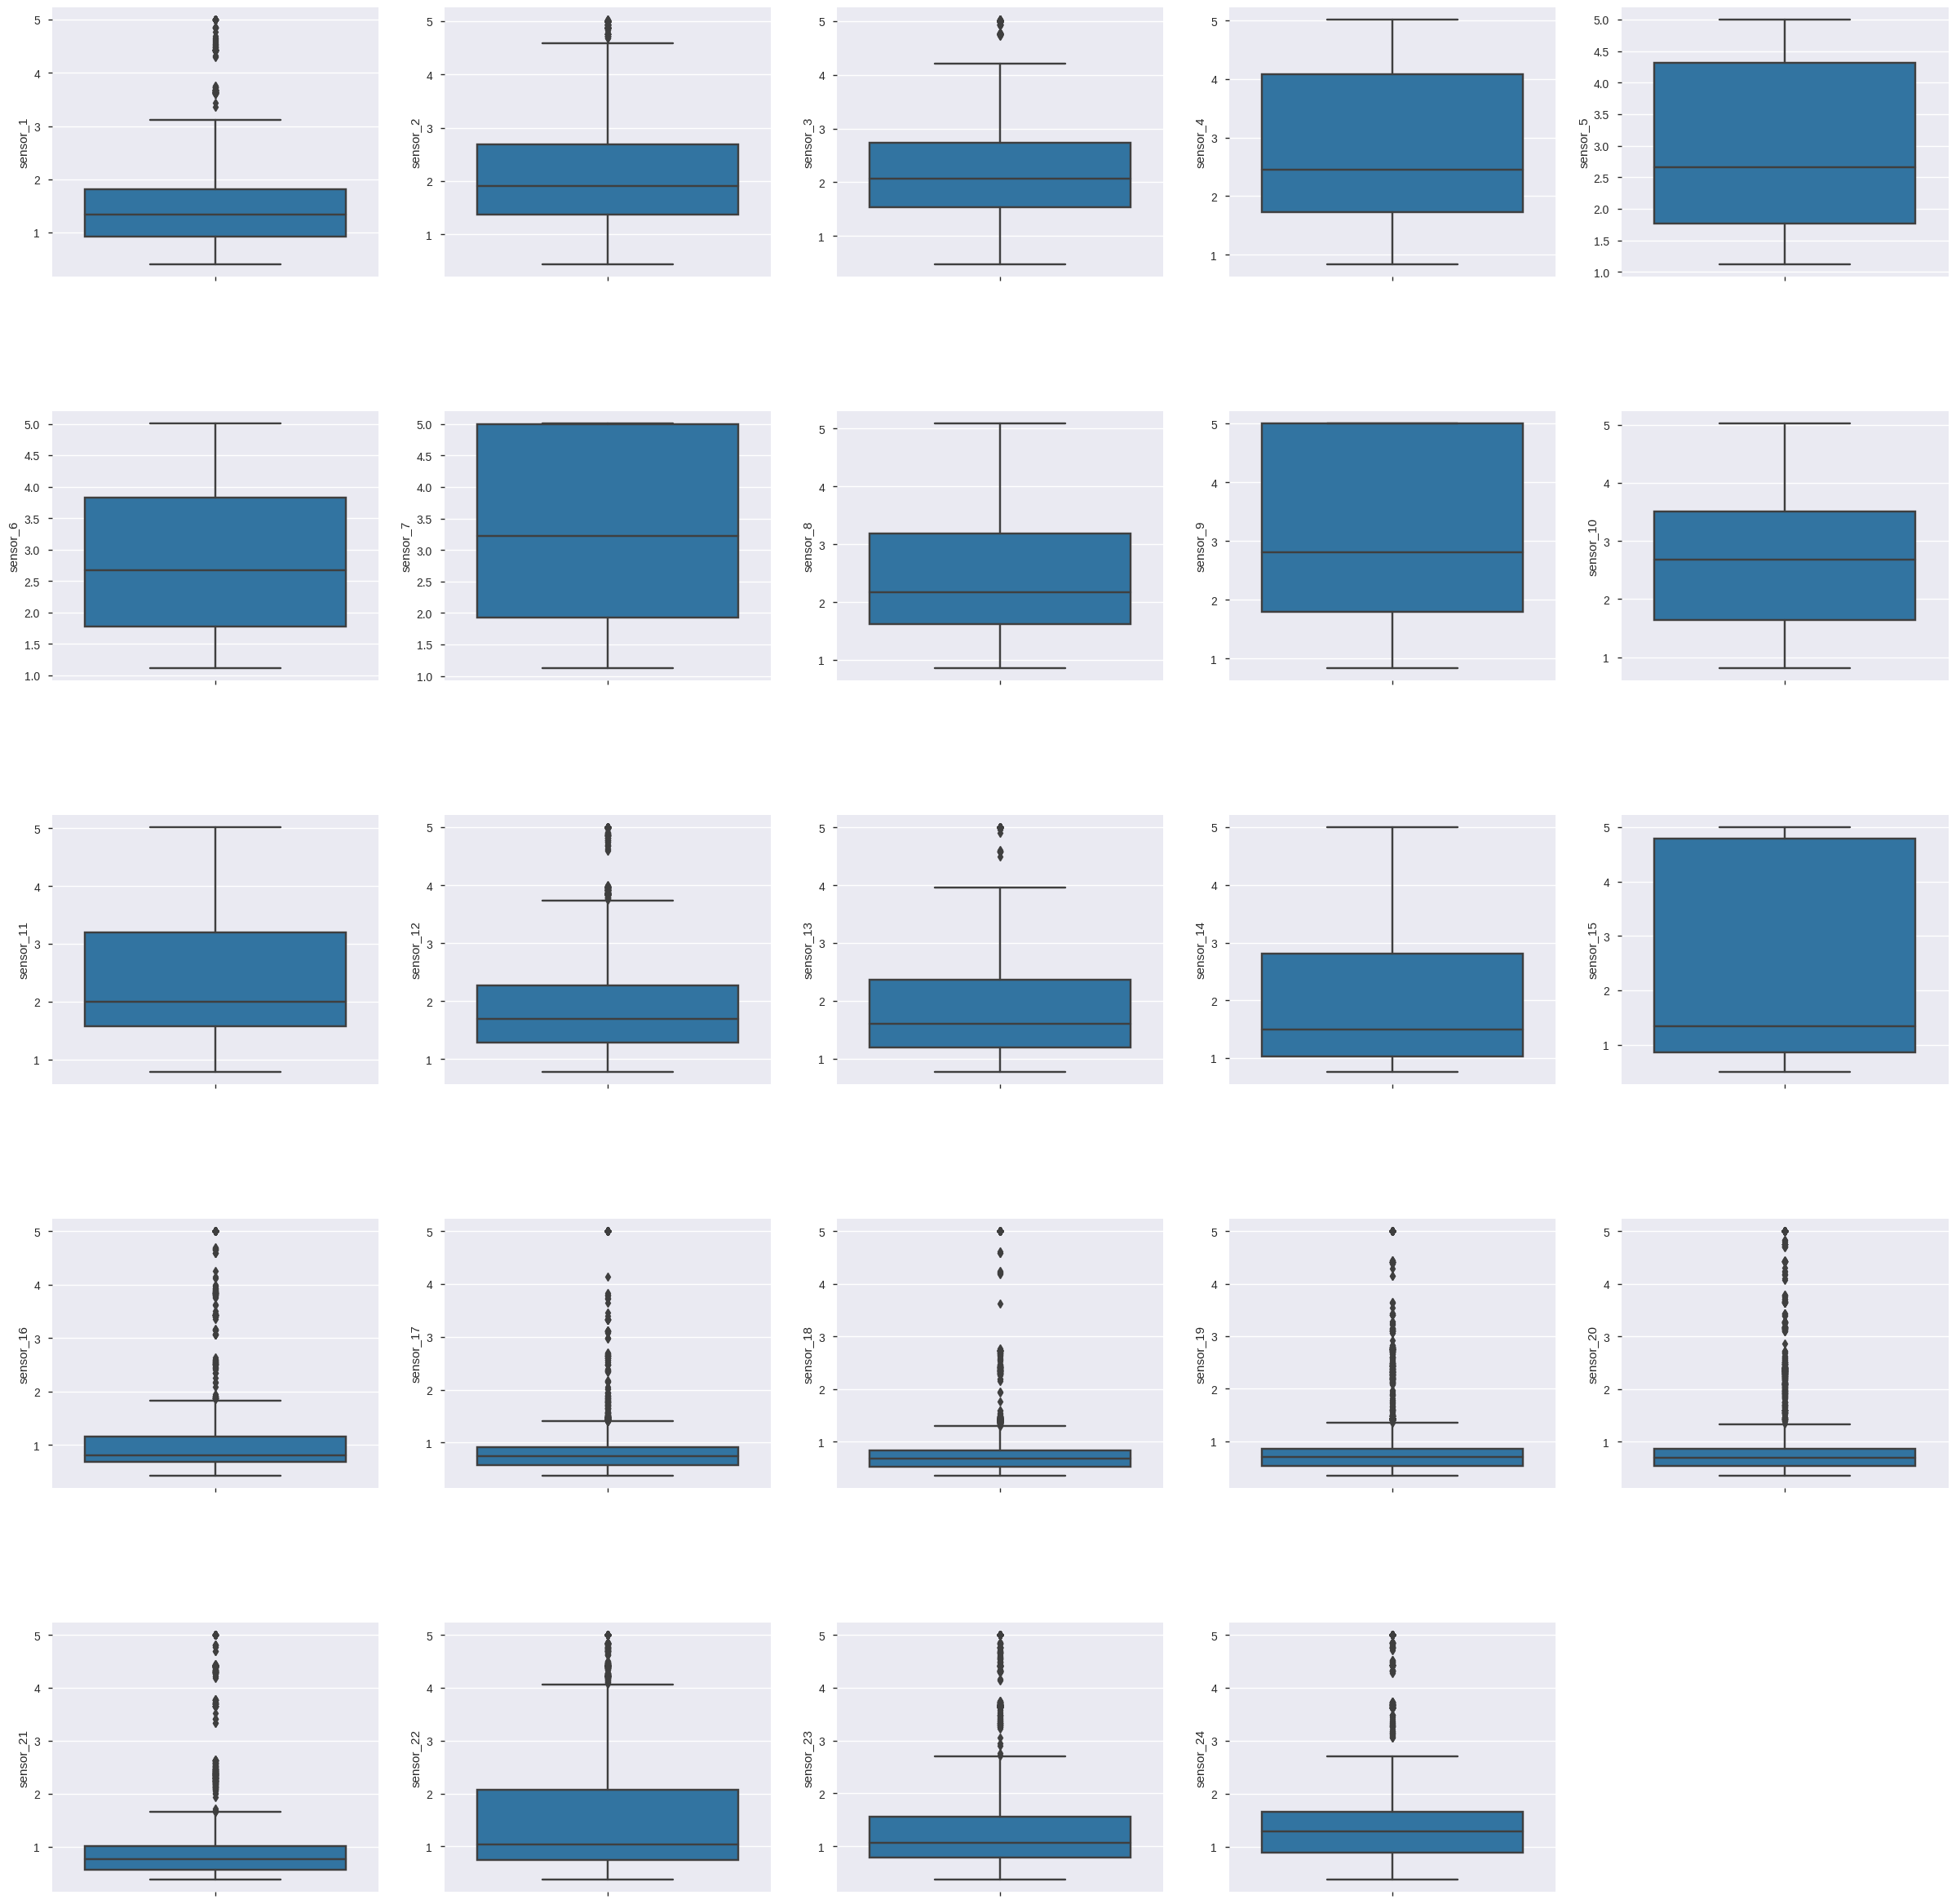

In [ ]:
plt.figure(figsize=(30,30))
plt.subplots_adjust(hspace=0.5)

i = 1
for col_name in dados_S.columns.drop('funcao_robo'):
    plt.subplot(5,5,i)
    sns.boxplot(data=dados_S, y=col_name)
    i +=1

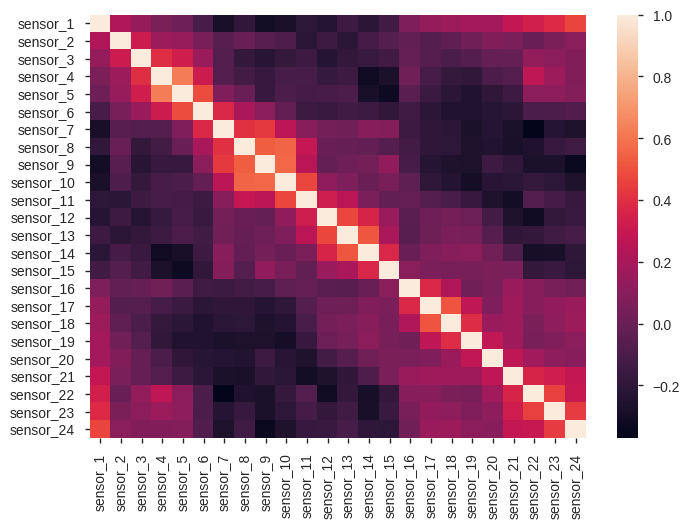

In [ ]:
sns.heatmap(dados_S.corr())

<Figure size 800x550 with 0 Axes>

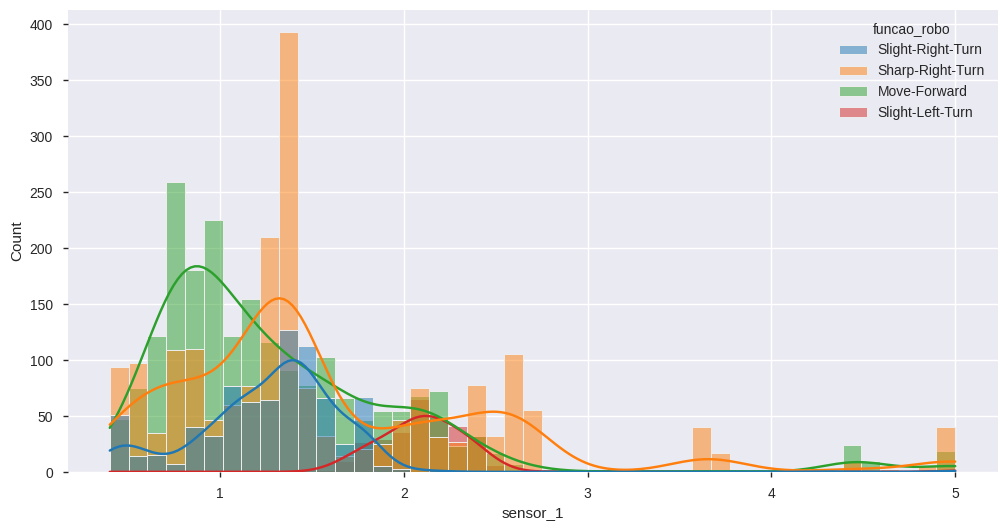

In [ ]:
plt.subplots_adjust(wspace = 0.60, hspace=0.60)
plt.figure(figsize=(12,6))

sns.histplot(
            data=dados_S,  # Perceba que estamos passando a coluna o dataframe completo
            x = 'sensor_1', # E aqui estamos selecionando a coluna
            kde=True,
            linewidth=0.7,
            hue = 'funcao_robo'
)

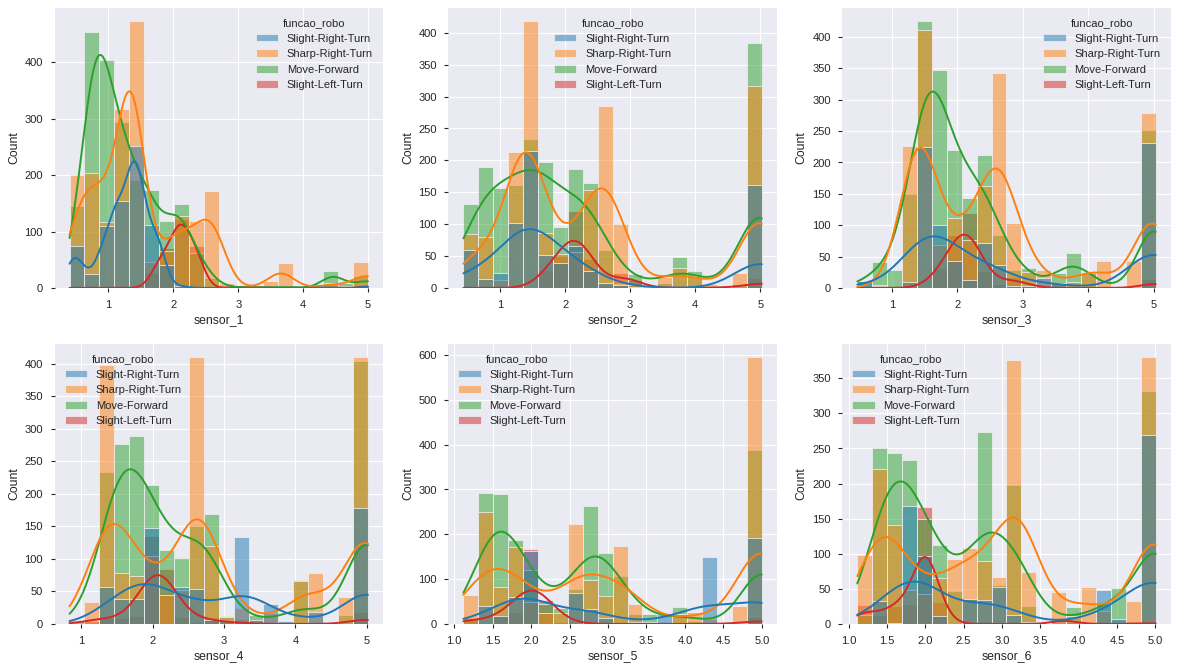

<Figure size 1200x600 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), dpi=80)
plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace = 0.80, hspace=0.80)
sns.histplot(ax=axes[0][0],
            data=dados_S,  # Perceba que estamos passando a coluna o dataframe completo
            x = 'sensor_1', # E aqui estamos selecionando a coluna
            kde=True,
            bins=20,
            linewidth=0.7,
            hue = 'funcao_robo',
            )

sns.histplot(ax=axes[0][1],
           data=dados_S,  # Perceba que estamos passando a coluna o dataframe completo
            x = 'sensor_2', # E aqui estamos selecionando a coluna
            kde=True,
            bins=20,
            linewidth=0.7,
            hue = 'funcao_robo',
            )

sns.histplot(ax=axes[0][2],
           data=dados_S,  # Perceba que estamos passando a coluna o dataframe completo
            x = 'sensor_3', # E aqui estamos selecionando a coluna
            kde=True,
            bins=20,
            linewidth=0.7,
            hue = 'funcao_robo',
            )
sns.histplot(ax=axes[1][0],
           data=dados_S,  # Perceba que estamos passando a coluna o dataframe completo
            x = 'sensor_4', # E aqui estamos selecionando a coluna
            kde=True,
            bins=20,
            linewidth=0.7,
            hue = 'funcao_robo',
            )
sns.histplot(ax=axes[1][1],
           data=dados_S,  # Perceba que estamos passando a coluna o dataframe completo
            x = 'sensor_5', # E aqui estamos selecionando a coluna
            kde=True,
            bins=20,
            linewidth=0.7,
            hue = 'funcao_robo',
            )
sns.histplot(ax=axes[1][2],
           data=dados_S,  # Perceba que estamos passando a coluna o dataframe completo
            x = 'sensor_6', # E aqui estamos selecionando a coluna
            kde=True,
            bins=20,
            linewidth=0.7,
            hue = 'funcao_robo',
            )

plt.subplots_adjust(wspace=0.2, hspace=0.4)

### *Verificação dos dados sobre a coluna funcao_robo que é a coluna que será á base da Análise.*

In [ ]:
dados_S['funcao_robo'].value_counts()

Move-Forward         2077
Sharp-Right-Turn     1963
Slight-Right-Turn     772
Slight-Left-Turn      303
Name: funcao_robo, dtype: int64

### *Escolhendo as colunas preditivas e alvo*




In [ ]:
# Escolhendo as colunas preditivas e alvo
x = dados_S.drop(columns = ['funcao_robo'] ) # Somente Comprimento do Abdômen e Comprimento das Antenas
y = dados_S['funcao_robo']# Classe alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
x_train.head(5)

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24
3684,1.275,4.070,1.330,5.000,2.772,2.375,2.358,1.543,4.912,0.879,...,1.155,3.414,0.631,0.648,0.717,5.000,1.174,1.187,1.261,1.261
3845,1.500,1.504,1.528,2.016,2.009,1.792,3.215,3.227,3.817,5.000,...,1.414,1.426,0.649,0.500,0.487,0.488,0.518,1.582,0.578,1.517
3109,2.374,2.598,2.596,5.000,3.248,3.234,3.235,2.793,2.794,2.811,...,0.816,0.435,0.893,0.791,0.766,0.866,0.866,0.918,5.000,1.584
2505,0.435,0.466,0.500,1.416,1.410,1.419,1.592,1.462,2.667,2.679,...,5.000,0.836,0.825,0.835,1.020,1.025,0.445,0.420,0.410,0.419
4174,0.815,2.923,2.755,2.901,5.000,4.064,5.000,1.535,1.515,1.512,...,0.774,0.780,0.791,0.816,0.783,0.757,0.745,0.753,0.773,5.000


### *Fazendo o treino dos dados*

In [ ]:
lda = LinearDiscriminantAnalysis()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)

lda.fit(x_train,y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

LinearDiscriminantAnalysis()

In [ ]:
# Perceba que estamos passando apenas o x de teste, afinal o algoritmo é que nos dira qual é o y 
y_predicoes = lda.predict(x_test) 

<Figure size 1500x500 with 0 Axes>

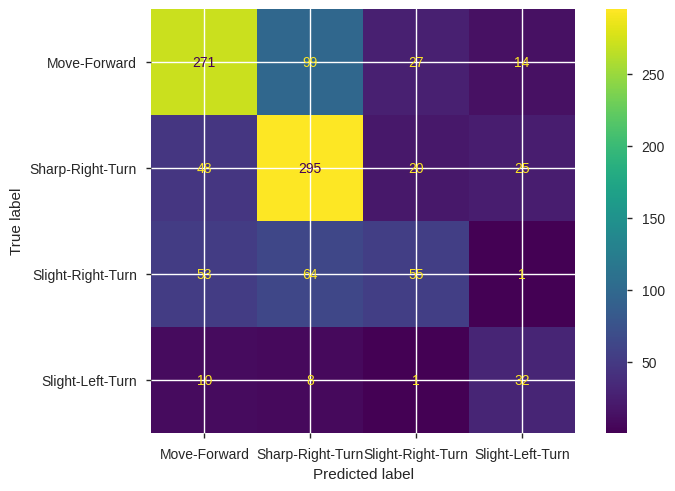

In [ ]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=['Move-Forward', 'Sharp-Right-Turn', 'Slight-Right-Turn','Slight-Left-Turn'])

# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Move-Forward', 'Sharp-Right-Turn', 'Slight-Right-Turn','Slight-Left-Turn'])
disp.plot(values_format='d') 

In [ ]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

                   precision    recall  f1-score   support

     Move-Forward       0.71      0.66      0.68       411
 Sharp-Right-Turn       0.63      0.76      0.69       388
 Slight-Left-Turn       0.44      0.63      0.52        51
Slight-Right-Turn       0.53      0.32      0.40       173

         accuracy                           0.64      1023
        macro avg       0.58      0.59      0.57      1023
     weighted avg       0.64      0.64      0.63      1023



In [ ]:
# Métrica do Coeficiente Kappa de Cohen
cohen_kappa_score(y_test, y_predicoes)

0.4492220922313992

### *Utilização do Algoritimo Naive Bayes Gaussiano*

In [ ]:
# Naive Bayes Gaussiano
from sklearn.naive_bayes import GaussianNB

# Passo 2 - Treinar o Classificador
gnb = GaussianNB()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)
gnb.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Passo 3 - Testar o Classificador
y_predicoes = gnb.predict(x_test) 

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

                   precision    recall  f1-score   support

     Move-Forward       0.69      0.41      0.51       411
 Sharp-Right-Turn       0.73      0.47      0.57       388
 Slight-Left-Turn       0.43      0.98      0.60        51
Slight-Right-Turn       0.36      0.86      0.51       173

         accuracy                           0.54      1023
        macro avg       0.55      0.68      0.55      1023
     weighted avg       0.64      0.54      0.54      1023



### *Utilização do Algoritimo KNeighbors*

In [ ]:
# k-vizinhos mais próximos (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Passo 2 - Treinar o Classificador
knn = KNeighborsClassifier() # Criando classificador (sem nenhum hiperparametro)
knn.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Passo 3 - Testar o Classificador
y_predicoes = knn.predict(x_test) 

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

                   precision    recall  f1-score   support

     Move-Forward       0.84      0.85      0.85       411
 Sharp-Right-Turn       0.88      0.86      0.87       388
 Slight-Left-Turn       0.80      0.84      0.82        51
Slight-Right-Turn       0.83      0.83      0.83       173

         accuracy                           0.85      1023
        macro avg       0.84      0.85      0.84      1023
     weighted avg       0.85      0.85      0.85      1023



ARQUIVO 02 


## **Análise Dataset Sensores:**

###*Como verificado pelos algoritimos como KNN e Naive Bayes, os dados estão bem próximos de uma correlação harmonica, onde se consegue verificar que os sensores dispostos no robo, conseguiria sim, de uma maneira otimizada ser utilizado para carros autonomos, prevalecendo o de maior precisão, que seria o KNeighbors.*

---

